# Algoritmo de detección de estilo musical para canciones de Spotify
## Modelo N°1 

Spotify es una de las plataformas de streaming de música mas grande a nivel mundial. La misma cuenta con un catalogo inmenso de música de lo mas variada. Es por esto que se requieren algoritmos que puedan agrupar estas canciones de forma automática para mejorar los modelos de recomendación de canciones y no solo mejorar la experiencia del escuchante, sino permitirle a los artistas ser escuchados por usuarios que usualmente escuchen musica similar.

En este proyecto se busca realizar un algoritmo de clasificación que determine que género musical pertenece una canción, dandole a elegir al mismo entre 2 opciones posibles. Para esto se crea una especie de "plantilla" la cual con pocas modificaciones funcione correctamente al cambiar los géneros analizados. 

En esta primera parte se buca que detecte si una determinada canción pertenece a una playlist de música clasica o a una playlist de Trap. Para esto se cuenta con 2 datasets, uno de cada estilo musical, que juntan diversas playlists que en Spotify se seleccionan como estos generos musicales. En el segundo modelo, se adapta el mismo para la predicción entre Rock Nacional Argentino y Cumbia Clásica.

El dataset se obtuvo utilizando el Script "Data Acquisition", el cual utiliza las APIs proporcionadas por Spotify y la libreria Spotipy para la obtención de parametros tanto musicales como otros mas ligados a lo admisistrativo de cada una de las canciones.


In [1]:
genero_0 = 'Música Clásica'  # Género del Target 0
genero_1 = 'Trap'  # Género del Target 1


La información se almacena en 2 tablas distintas las cuales son:

__Dataset0:__ Contiene las características de las canciones de música clásica extraídas de Spotify.

__Dataset1:__ Contiene las características de las canciones de trap extraídas de Spotify.

# Indice

* [Datasets](#Datasets)
* [EDA - Analisis exploratorio de Datos](#EDA---Analisis-exploratorio-de-Datos)
* [Selección del algoritmo](#Selección-del-algoritmo)

# Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply

In [3]:
np.random.seed(5) #Se selecciona una seed para que los números aleatorios generados por Python sean los mismos en cada ejecución
#del código y los resultados sean reproducibles y mantengan el sentido con lo analizado en los _Markdowns_

In [4]:
#Importo los datasets
df0 = pd.read_csv('Musica clasica.csv')
df1 = pd.read_csv('Trap.csv')


In [5]:
#Muestra del dataset de música clásica
print('El dataset de', genero_0, 'contiene:', df0.shape[0], 'canciones')
df0.sample(2).head()

El dataset de Música Clásica contiene: 360 canciones


,id,title,all_artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
310,2eSVQH8lwcrUBs7dpEj7p7,Bruyères - Home Session,Víkingur Ólafsson,59,2020-10-16,False,0.300,0.04050,8,-31.023,1,0.992,0.948,0.1380,0.233,63.821,216061,3,0
328,3WXj9zWNL8X03WiC1muLZ6,A Little Book of Hours: VI. Singing Sun,Elena Riu,0,2000-01-01,False,0.346,0.00398,10,-44.526,1,0.992,0.878,0.0643,0.318,78.891,103600,5,0


In [6]:
#Muestra del dataset de música clásica
print('El dataset de', genero_1, 'contiene:', df1.shape[0], 'canciones')
df1.sample(2).head()

El dataset de Trap contiene: 580 canciones


,id,title,all_artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
79,1EyAzuahvdZUBKs5LCzFpr,Iba a llamarte,C.R.O,31,2019-03-28,False,0.688,0.601,0,-5.691,1,0.178,0.000491,0.176,0.307,137.976,215451,4,1
3,6ovp1nCwIAOSMotiCF7pjk,Bufón,LIT killah,57,2018-06-08,False,0.851,0.637,5,-5.534,1,0.165,0.000000,0.366,0.526,130.071,242500,4,1


###### Descripción de cada feature

1. id: El ID que la canción tiene en Spotify. Puede usarse para obtener el link a la canción.
2. title: Es el nombre de la canción. 
3. all_artist: Contiene el nombre del artita principal de la canción.
4. popularity: Varía entre 0 y 100 y determina la popularidad de una canción actualmente.
5. release_date: Contiene en un string la fecha de publicación de la canción. En algunos casos viejos solo contiene el año, mientras que ususalmente contiene también dia y mes en formato año-mes-día.
6. explicit: Determina si se seleccionó a la canción como que contiene letras explícitas. 0 es que no contiene y 1 es que si contiene.
7. danceability: Varía entre 0 y 1 y determina que tan apta es la canción para bailar.
8. energy: Varía entre 0 y 1 y representa la intensidad y acitvidad de la canción.
9. key: La nota principal de la canción, siendo 0 la nota "Do" y subiendo de a semitonos hasta 11 la cual es "Si". Si es -1 no se pudo detectar la nota.
10. loudness: Varía entre -60 y 0 y determina la intensidad psicológica del nivel sonoro promedio de la canción en dB. 
11. mode: Indica la modalidad de la canción, siendo menor cuando es 0 y mayor cuando es 1.
12. acousticness: Varía entre 0 y 1, siendo esta la confianza de que la canción sea acustica.
13. instrumentalness: Varía entre 0 y 1 y es la confianza de que la canción no contenga conteido cantado. Sonidos de acompañamento como "Ohh" y "Ahh" no se cuenta como letra cantada.
14. liveness: Varía entre 0 y 1 y es la confianza de que se detectó una audiencia en la canción, como por ejemplo una versión en vivo en algún recital.
15. valence: Describe la positividad de la canción variando entre 0 y 1, siendo los valores mas altos las canciones mas postivas (feliz, alegre, euforica), mientras que los valores mas bajos las canciones mas negativas (triste, depresiva, enojada).
16. tempo: Es el tempo promedio detectado de la canción en BPM.
17. duration_ms: Es la duración de la canción en milisegundos.
18. time_signature: Es el patrón rítmico detectado de la canción, siendo "X/4" con X e valor mostrado en el dataset.
19. target: A que playlist perteneces, 0 es clásica y 1 es trap.


### Modificación de la "release_date" a "year"


El release_date no es muy útil en este formato, por lo que se lo transforma a 'year' para que así solo contenga en año en que se lanzó la canción.

In [7]:
df0.rename(columns={'release_date': 'year'}, inplace=True)

for i in range(df0.shape[0]):
    df0.loc[i, 'year'] = df0.loc[i, 'year'][0:4] 
    
df0['year'] = df0['year'].astype('int')  

df0.head(1)

,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,1NfZx14QUowIqvpYyStE3I,"Symphony No. 5 in C Minor, Op. 67: I. Allegro ...",Béla Drahos,43,2015,False,0.415,0.202,0,-16.016,0,0.972,0.884,0.0894,0.112,93.678,435667,4,0


In [8]:
df1.rename(columns={'release_date': 'year'}, inplace=True)

for i in range(df1.shape[0]):
    df1.loc[i, 'year'] = df1.loc[i, 'year'][0:4] 
    
df1['year'] = df1['year'].astype('int')    

df1.head(1)


,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,5Z0ZvUMB1MWZo5XYZdp0Vt,Alas,C.R.O,54,2018,False,0.749,0.681,5,-8.656,0,0.413,0.000006,0.106,0.618,123.981,201290,4,1


La modificación del campo release_date al campo year se logró de forma exitosa.

### Analisis de cada feature

In [9]:
#No se observan valores faltantes, algo esperado ya que los valores fueron tomados de la APi de Spotify
print(genero_0)
df0.count()

Música Clásica


id                  360
title               360
all_artists         360
popularity          360
year                360
explicit            360
danceability        360
energy              360
key                 360
loudness            360
mode                360
acousticness        360
instrumentalness    360
liveness            360
valence             360
tempo               360
duration_ms         360
time_signature      360
target              360
dtype: int64

In [10]:
print(genero_1)
df1.count()

Trap


id                  580
title               580
all_artists         580
popularity          580
year                580
explicit            580
danceability        580
energy              580
key                 580
loudness            580
mode                580
acousticness        580
instrumentalness    580
liveness            580
valence             580
tempo               580
duration_ms         580
time_signature      580
target              580
dtype: int64

In [11]:
print('Tipo de cada feature')
df0.dtypes

Tipo de cada feature


id                   object
title                object
all_artists          object
popularity            int64
year                  int32
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
target                int64
dtype: object

# EDA - Analisis exploratorio de Datos

## Analisis Univariado del proyecto

In [12]:
fig = ply.histogram(df0, x = 'year', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'year': 'Año'})
fig.update_layout(title={
        'text': "Cantidad de canciones por año de " + str(genero_0),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Año')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

In [13]:
fig = ply.histogram(df1, x = 'year', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'year': 'Año'})
fig.update_layout(title={
        'text': "Cantidad de canciones por año de " + str(genero_1),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Año')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

Se observa que el year es cuando se grabó la versión de la canción que está en spotify, no cuando fue originalmente creada la misma. Sin embargo, la gran diferenecia entre los datasets es muy visible ya que el dataset de trap comienza en el 2016 y la clásica tiene gran parte de sus canciones desde antes del 2014.

In [14]:
fig = ply.histogram(df0['explicit'].replace({False: 'No', True: 'Si'}), x = 'explicit', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'explicit': 'Explicita', '0': 'No'})
fig.update_layout(title={
        'text': "Cantidad de canciones con o sin letras explicitas de " + str(genero_0),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Contiene letras explicitas?')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

In [15]:
fig = ply.histogram(df1['explicit'].replace({False: 'No', True: 'Si'}), x = 'explicit', title='Canciones por año', color_discrete_sequence=['indianred'], labels={'explicit': 'Explicita', '0': 'No'})
fig.update_layout(title={
        'text': "Cantidad de canciones con o sin letras explicitas de " + str(genero_1),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Contiene letras explicitas?')
fig.update_yaxes(title_text = 'Cantidad de canciones')
fig.show()

Obviamente la música clásica no contiene letras explícitas debido a que no contiene letras, mientras que en el caso del trap casi la mitad de la misma contiene letras explícitas.

## Analisis Bivariado del proyecto

Al tener una gran cantidad de campos numéricos un HeatMap es muy util para encontrar relaciones lineales entre las variables, Puede ser que el Heatmap no reconozca una relación existente entre las variables debido a que la misma no es lineal. Para hacer esto se unen los datasets en un dataset final y así poder observar la relación con el target.



In [16]:
df_final = pd.concat([df0, df1], ignore_index=True)

print(df_final.shape)
df_final.sample(3).head()

(940, 19)


,id,title,all_artists,popularity,year,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
25,3UjRrlfDTsWJDbRHJZVIRl,Romeo y Julieta: Obertura,Orquesta Manuel de Falla,0,1997,False,0.331,0.488,2,-15.130,1,0.6780,0.946000,0.0892,0.154,113.177,362347,4,0
470,6jwcchNlcoMZFa0EwfKga6,Perdóname,FMK,60,2018,False,0.697,0.413,10,-8.870,0,0.0345,0.000024,0.1060,0.123,130.121,163466,4,1
503,2PKb7tFxkwMoS7Y6muOTAR,"Zaramay: Bzrp Music Sessions, Vol. 31",ZARAMAY,65,2020,False,0.816,0.414,1,-9.654,1,0.3920,0.000088,0.0956,0.832,88.015,219545,4,1


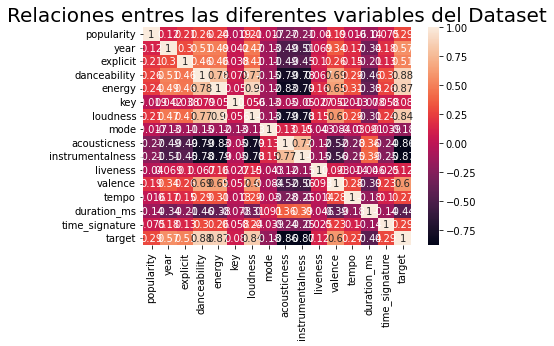

In [17]:
#HeatMap 


sns.heatmap(df_final.corr(), annot = True)
plt.title('Relaciones entres las diferentes variables del Dataset', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (20, 15)




Se observa como la target tiene fuertes relaciones con muchas de las variables analizadas, algo esperables debido a la gran diferencia entre los estilos analizados. 

Al tener ambos dataframes juntos se puede observar la distribución de las canciones a través de los años de una manera mejor

In [18]:
fig = ply.histogram(df_final.replace({0: str(genero_0), 1: str(genero_1)}), x = 'year', 
                    title='Canciones por año', color='target', labels={'target': 'Playlist:'}, nbins=100)

fig.update_layout(title={
        'text': "Cantidad de canciones por año segmentada por lista",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title_text = 'Año')
fig.update_yaxes(title_text = 'Cantidad de canciones')

fig.show()

La relación entre el target y la danceability de las canciones es algo esperado ya que el trap es visto como un estilo hecho en su mayor parte para ser bailado, en contrario con lo que sucede en la música clásica. Esta relación se observa en el siguiente gráfico de violín. 

In [19]:
fig = ply.violin(df_final.replace({0: str(genero_0), 1: str(genero_1)}),'target','danceability', color_discrete_sequence=['indianred'])

fig.update_layout(title={
        'text': "Distribución de la danceability para cada target", 'y':0.95, 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title_text = 'Playlist')
fig.update_yaxes(title_text = 'Danceability')

fig.show()

Se ve que el trap tiene una distribución muy concentrada en el 0.8 y con un valor mínimo de 0.38, mientras que la mayor parte e la música clásica se concentra por debajo del 0.5. Es decir, que cuanta mayor danceability mayor probabilidad de que sea de trap.

La instrumentalness tambíen es una relación fuerte esperable, debido a que la música clásica es casi siempre instrumental y el trap casi nunca lo es. La relación no es un 1 perfecto debido a que la detección la realiza un algoritmo y el valor es el porcentaje de confianza. Ambas realciones se pueden ver en el siguiente gráfico.

In [20]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df_final['instrumentalness'][df_final['target'] == 0], df_final['instrumentalness'][df_final['target'] == 1]], [str(genero_0),str(genero_1)], bin_size=1/50)

fig.show()



Se observa como la playlist de trap esta casi por completo debjo del 0.1, marcando que casi no tenga temas instrumentales. Mientras que la playlist de música clásica tiene gran concentración por sobre 0.8 aunque tiene mas valores dispersos que la otra playlist.

## Analisis Multivariado del proyecto

Se analiza la relación de *acousticness* con *energy* y la playlist a la que pertenecen.

In [21]:
df_test = df_final.copy()
df_test['target'] = df_test['target'].astype('str')

fig = ply.scatter(df_test.replace({'0':str(genero_0), '1': str(genero_1)}), 'acousticness', 'energy', 
                  color='target', labels={'target': 'Playlist'}, trendline='ols')

fig.update_layout(title={
        'text': "Relación de acousticness con popularity y loudness", 'y':0.95, 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top'})
fig.update_yaxes(title_text = 'Energy')
fig.update_xaxes(title_text = 'Acousticness')
fig.show()

Se observa como la música clásica tiene muy alta probabilidad de ser acústica y baja energía, mientras que el trap es completamente lo contrario. A su vez, ambas variables tienen una relación inversa, cuanto mas acúsitca menos energía tiene. La gran diferencia también se observa en las curvas de regresión lineal graficadas.

Se analizan las relaciones entre las features que tienen relaciones mas altas con el target.

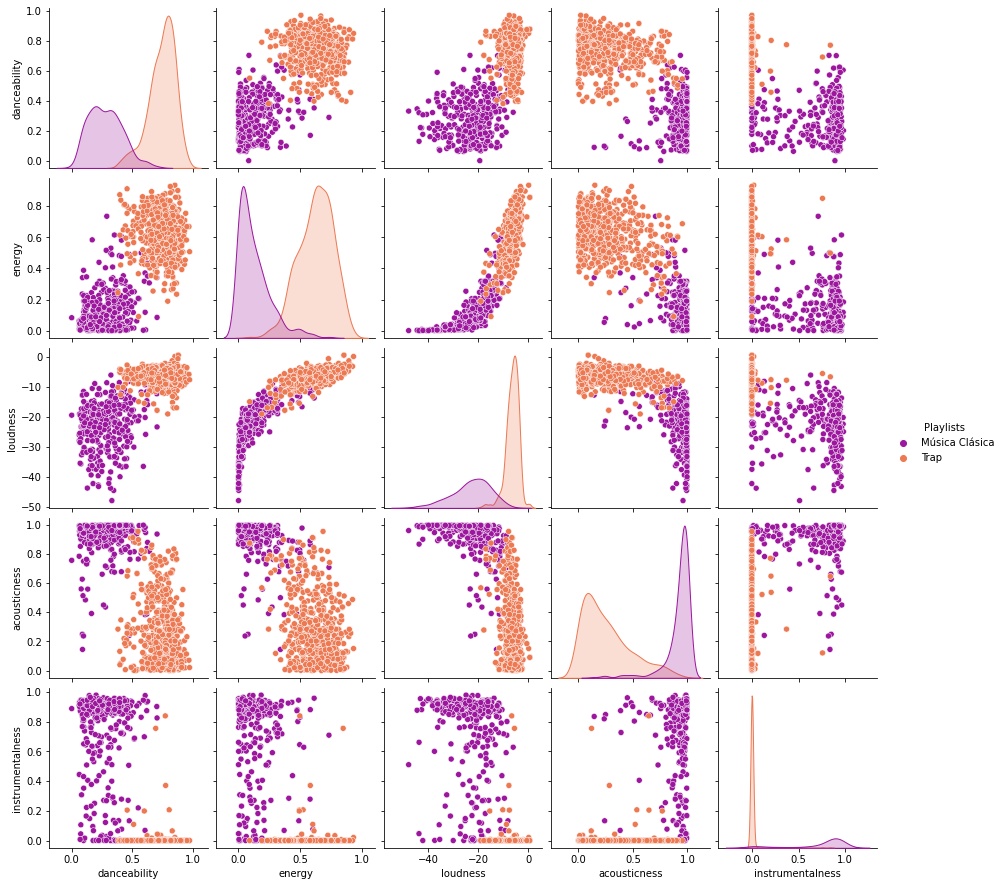

In [22]:
df_test = df_final.copy()
df_test['target'].replace({0: str(genero_0), 1: str(genero_1)}, inplace=True);
df_test.rename(columns={'target': 'Playlists'}, inplace=True)
sns.pairplot(df_test, hue='Playlists', palette='plasma',
             x_vars=['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness'], 
             y_vars=['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']);


Se observan no solo las claras agrupaciones por color, remarcando la diferencia entre las playlsits, sino también las diferentes formas que denotan las relaciones entre las diferentes variables.

La relación entre *valence* y *danceabilty* parece intuitiva. A su vez, en el heatmap se ve su realción con *explicit* 

In [23]:
fig = ply.scatter(df_test.replace({'0':'Música clásica', '1': 'Trap'}), 'valence', 'danceability', color='Playlists',
                  trendline='ols', labels={'target': 'Playlist'})
fig.update_layout(title={
        'text': "Relación entre Valence, Danceability y la playlist", 'y':0.95, 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title_text = 'Danceability')
fig.update_yaxes(title_text = 'Valence')
fig.show()

Se observa la presencia de muchos mas puntos rojos en la parte superior del gráfico, donde la *valencia* es alta y cierta tendencia lineal ascendente en terminos de la variable *Danceability*. 

# Selección del algoritmo
Debido a que es un problema de clasificación se opta por un arbol de decisión, en el caso de que el mismo no sea satisfactorio se puede comparar con los resultados de un bosque aleatorio para obtener el mejor algoritmo posible. Sin embargo, al ser el árbol de decisión mucho menos costo computacional, se busca resolver el problema solo con el mismo. 

In [24]:
#Se importan las librerias necesarias para los modelos
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [25]:
#Se eliminan las columnas del dataset que no se requiren para el modelo
df_modelo = df_final.drop(['id', 'title', 'all_artists', 'key', 'mode', 'liveness'], axis = 1)
df_modelo.sample(5).head()

,popularity,year,explicit,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,target
488,46,2018,False,0.806,0.722,-2.463,0.2030,0.000,0.5690,134.984,206222,4,1
603,56,2020,False,0.699,0.667,-5.123,0.0621,0.000,0.4850,149.989,188800,4,1
240,49,2010,False,0.444,0.116,-23.172,0.9770,0.868,0.5120,150.319,145613,4,0
58,0,2015,False,0.245,0.247,-19.534,0.8630,0.698,0.1070,73.114,770520,4,0
284,0,2022,False,0.185,0.159,-17.202,0.9220,0.182,0.0435,103.914,418080,4,0


### Árbol de decisión

Se comienza utilizando el método GridSearchCV para obtener los parametros del árvol de decision que mejor resultados entreguen:

- criterion = Define el método para calcular la impureza de cada hoja del árbol. Se elije la función "Gini" debido a su menor costo computacional, aunque si no se obtienen resultados esperados se compararán sus resultados con las otras funciones disponibles.

- min_samples_split = Es la cantidad de muestras que necesita un nodo para tener permitida la subdivisión, se busca un valor entre 6 y 12.

- min_samples_leaf = Es la cantidad de muestras mpinima que tendrá una hoja. Junto con el parametro anterior se pueden ver como una forma de suavizar el modelo. Se comienza busca un valor entre 3 y 6.

- max Depth = Es la cantidad máxima de capas que puede tener el árbol, se busca un valor entre 1 y 9.


## Entrenamiento del modelo

### StratifiedKFold y GridSearchCV

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [27]:
#Separación en X e y
y = df_modelo['target'].to_numpy()
X = df_modelo.drop(['target'], axis=1).to_numpy()

In [28]:
skf = StratifiedKFold(n_splits=7, random_state=15, shuffle=True)
train, test = list(skf.split(X, y))[0]
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

In [29]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion':['gini'],
              'min_samples_split': np.arange(6, 13),
              'min_samples_leaf': np.arange(3, 7),
              'max_depth' : np.arange(1, 10), #Se selecciona un max_depth entre 1 y 9
              'class_weight':[{0: 1, 1:1.6}],
              'random_state':[15]} 
tree_tunner = GridSearchCV(tree_model, param_grid=param_grid, cv=skf)
tree_fit = tree_tunner.fit(X_train, y_train) #Se entrena el modelo

In [30]:
#Mediciones del acuracy para el testeo
pred_test = tree_fit.predict(X_test)
print('Acuracy para el dataset de testeo:', accuracy_score(y_test, pred_test))

#Mediciones del acuracy para el enternamiento
pred_train = tree_fit.predict(X_train)
print('Acuracy para el dataset de entrenamiento:', accuracy_score(y_train, pred_train))


Acuracy para el dataset de testeo: 0.9629629629629629
Acuracy para el dataset de entrenamiento: 0.9900621118012423


Se observan valores de accuracy muy altos para ambos casos, los cuales son esperados debido a la gran diferencia entre los generos musicales trabajados.

In [31]:
print("Los mejores parametros seleccioandos por el GridSearch fueron: "+str(tree_tunner.best_params_))

Los mejores parametros seleccioandos por el GridSearch fueron: {'class_weight': {0: 1, 1: 1.6}, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 6, 'random_state': 15}


## Indicadores de desempeño
El accurancy analizado previamente representa cuantos aciertos se obtuvieron sobre el total de muestras utilizadas para el testeo del algoritmo. Sin embargo, en mucho casos no es lo mismo un error "Falso positivo" que uno "Falso negativo". Este no es el caso en este proyecto, ya que etiquetar erroneamente una canción es lo mismo para ambos lados, no es asi en proyectos que se traten de temas mas sensibles. Sin embargo, un analisis de la matriz de confusión sigue siendo de utilidad.

### Matriz de confusión

c:\Users\grodr\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



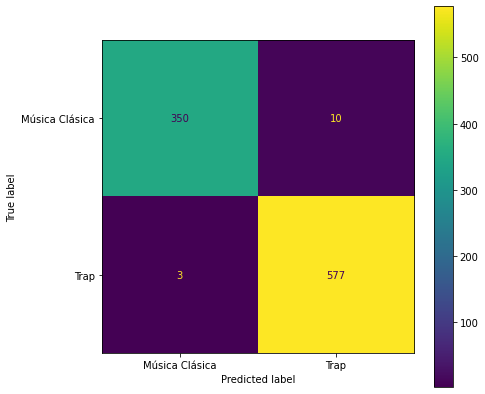

In [32]:
#Ploteamos la Matriz
plt.rcParams['figure.figsize'] = (7, 7)
plot_confusion_matrix(tree_fit, df_modelo.drop(['target'], axis=1).values, df_modelo["target"], display_labels=[str(genero_0), str(genero_1)])
plt.show()

Se observa como de los 13 errores cometidos, 10 fueron canciones de música clásica que se predijeron como trap, mientras que solo 3 fueron una canción de trap predicta como clásica. Como se dijo anteriormente, este desbalance no es de gran preocupación debido al tema tratado, pero en futuro se podría analizar si no es algo recurrente o simplemente sucede con este split realizado o los parametros elegidos.

## Visualización del árbol de decisión


In [33]:
tree_model = DecisionTreeClassifier(class_weight= {0: 1, 1: 1.6}, 
                                    criterion= 'gini', 
                                    max_depth= 3, 
                                    min_samples_leaf= 4, 
                                    min_samples_split= 6, 
                                    random_state= 15)

model = tree_model.fit(X_train, y_train)

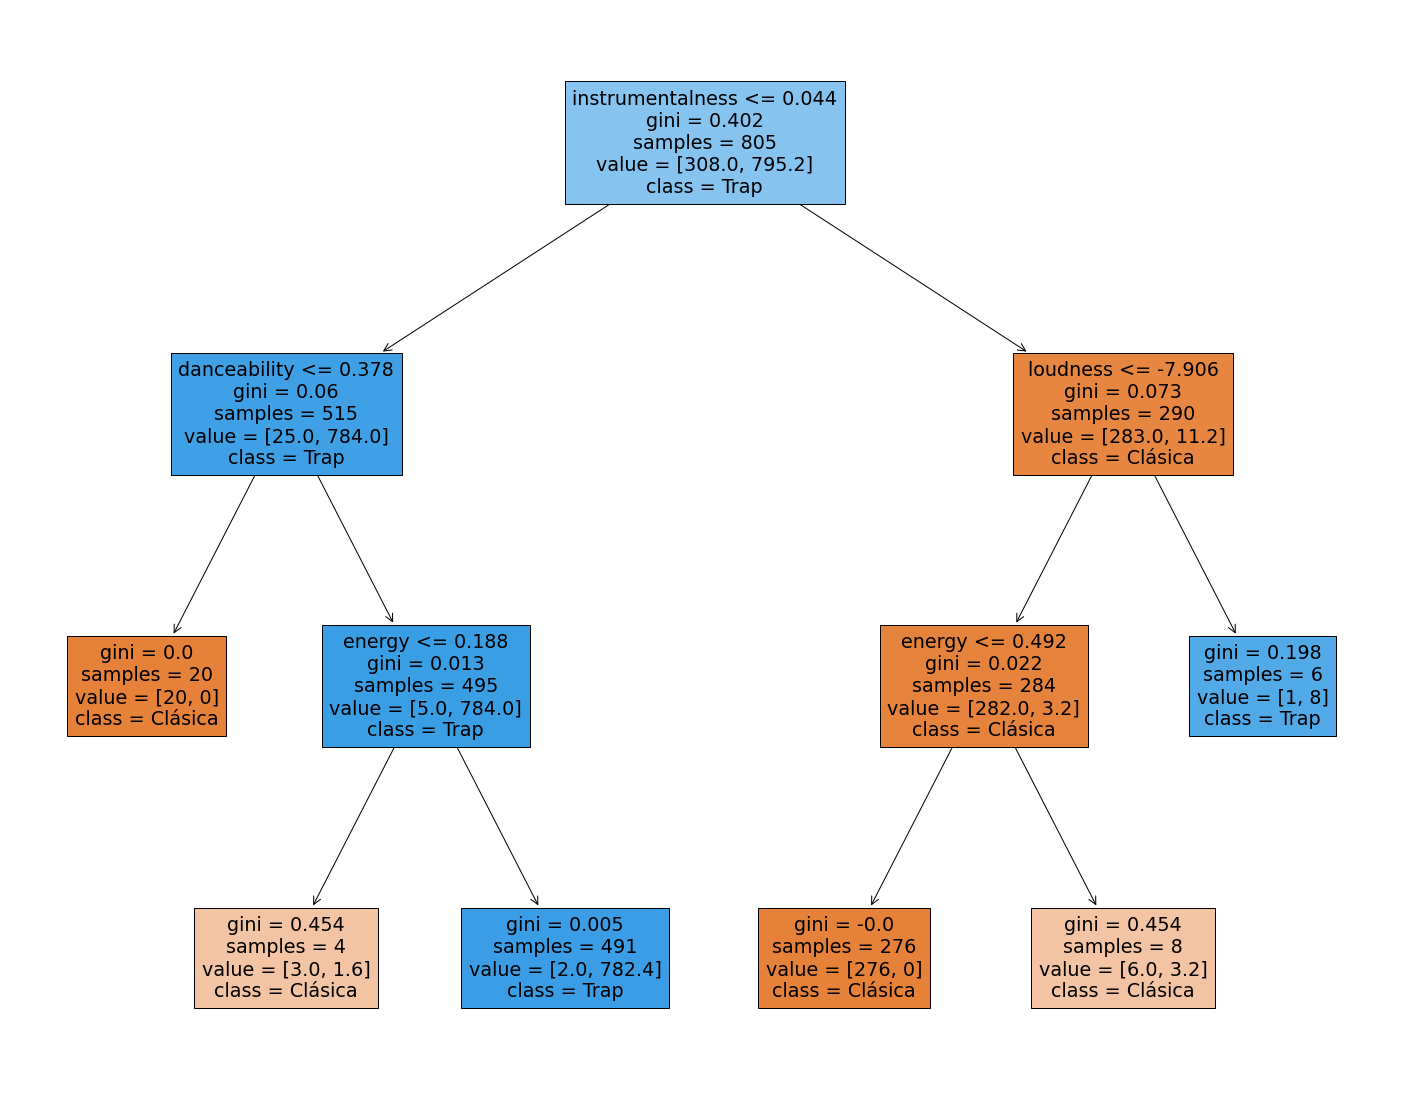

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, feature_names=df_modelo.drop('target', axis=1).columns,class_names=('Clásica','Trap'),filled=True)

En el árbol creado se puede observar como el threshold para cada feature, como en el primer caso donde  _Instrumentalness_ es de 0.044, y como se arma cada hoja.

## Predicción

In [35]:
df_pred = pd.DataFrame(columns=df_final.drop(['key', 'mode', 'liveness'], axis=1).columns) #Se crea el dataframe donde estaran los temas a predecir
df_pred.loc[0] = df_final.loc[575] #Agrego "Colocao" de Nicki Nicole al dataframe
print(f"Canción: {df_pred['title'][0]}")
print(f"Artista: {df_pred['all_artists'][0]}")

prediction = tree_model.predict(df_pred.drop(['id', 'title', 'all_artists', 'target'], axis = 1).values)

if prediction == 1:
    prediction_name = str(genero_1)
else:
    prediction_name = str(genero_0)

print(f"Prediccion: {str(prediction_name)}")
probability = tree_model.predict_proba(df_pred.drop(['id', 'title', 'all_artists', 'target'], axis = 1).values)
print("Probabilidad de Acierto: " + str(round(probability[0][prediction][0]* 100, 2))+"%")  

if prediction == df_pred['target'][0]:
    print('La predicción es acertada')
else:
    print('La predicción es erronea')

Canción: Colocao
Artista: Nicki Nicole
Prediccion: Trap
Probabilidad de Acierto: 99.75%
La predicción es acertada


Se observa como el modelo predice con un 99.75% de probabilidad que el tema "Colocao" pertenece a la playlist de Trap, lo cual es acertado.

## Predicción según ID de Spotify
Ingresando una Id de spotify se puede saber la probabilidad de que pertenezca a cada uno de los grupos. Cabe destacar que si la canción elegida es de algpun género que no pertenezca al analizado en este trabajo el resultado obtenido no será debe ser tomado en cuenta.

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [37]:
#Importing my own credentials for the Spotify API
cid_txt = open('Client_ID.txt')
client_secret_txt = open('Client_Secret.txt')

cid = cid_txt.read()
secret = client_secret_txt.read()

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [38]:
track_id = '3spdoTYpuCpmq19tuD0bOe'

df_pred = pd.DataFrame(columns=['id', 'title', 'all_artists', 'popularity', 'year', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'])

features = sp.audio_features(track_id)
track = sp.track(track_id)
df_pred.loc[0] = (track['id'],track['name'],track['artists'][0]['name'],track['popularity'],track['album']['release_date'][0:4],track['explicit'],features[0]['danceability'],features[0]['energy'],features[0]['key'],features[0]['loudness'],features[0]['mode'],features[0]['acousticness'],features[0]['instrumentalness'],features[0]['liveness'],features[0]['valence'],features[0]['tempo'],features[0]['duration_ms'],features[0]['time_signature'])  

print('Canción:', track['name'], 'de', track['artists'][0]['name'])
prediction = tree_model.predict(df_pred.drop(['id', 'title', 'all_artists', 'key', 'mode', 'liveness'], axis = 1).values)

if prediction == 1:
    prediction_name = str(genero_1)
else:
    prediction_name = str(genero_0)
        
print(f"Prediccion: {prediction_name}")
probability = tree_model.predict_proba(df_pred.drop(['id', 'title', 'all_artists', 'key', 'mode', 'liveness'], axis = 1).values)
print("Probabilidad de Acierto: " + str(round(probability[0][prediction][0]* 100, 2))+"%")  

Canción: My Way de Frank Sinatra
Prediccion: Trap
Probabilidad de Acierto: 99.75%


## Comparación de la importancia de cada feature

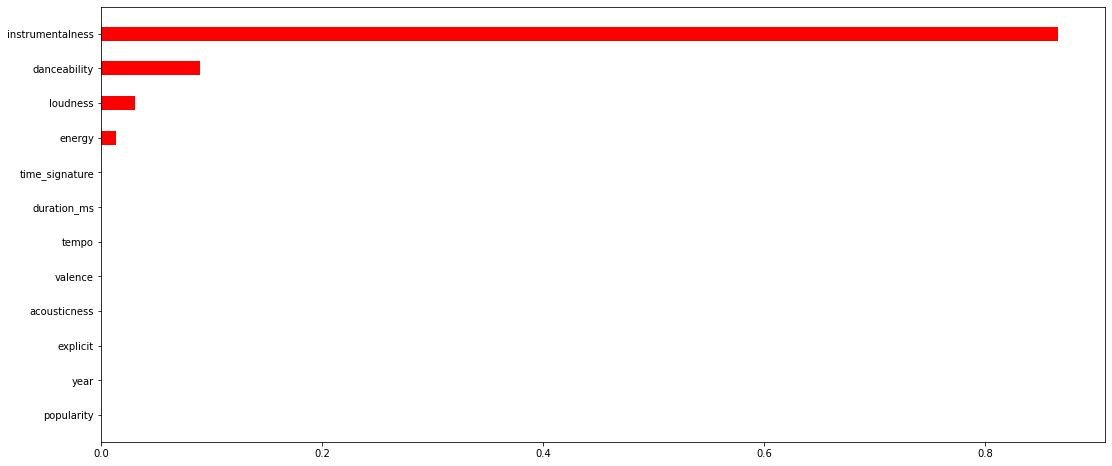

In [39]:
#Ploteo las importancias
feature_importance=pd.DataFrame({
    'dt':tree_model.feature_importances_
},index=df_modelo.drop(['target'], axis=1).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='red',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

plt.show()

Se observa como el modelo le da una importancia al feature "instrumentalness" de mas del 80%, mientras que el resto de la importancia la reparte en otras 3 features y deja sin importancia a las restantes. Esto se puede interperetar como que los dataset son muy diferentes entre sí y permiten al modelo una gran precisión con pocos parámetros, en el caso de cambiar los estilos musicales por 2 mas similares este es un punto para prestarle mas atención.

Una aclaración pertinente es que en árboles anteriores se observó una distribución similar pero con la variable predominante siendo la "danceability". 

La comparación con el Modelo N°2 y las conclusiones del proyecto se encuentran en el próximo Notebook.